In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Add_sales_data_2018.csv')

In [3]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
df.shape

(205, 7)

In [5]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [6]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

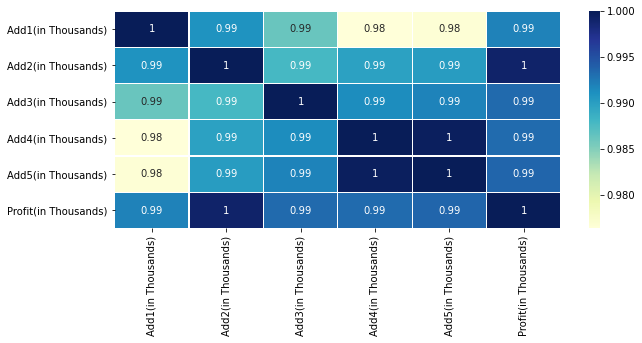

In [7]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,linewidth=0.2,cmap='YlGnBu')

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [8]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [9]:
y=df['Profit(in Thousands)']
x=df.drop(['Date', 'Add4(in Thousands)', 'Profit(in Thousands)'],axis=1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5,test_size=.2)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr=LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(x_test)

In [16]:
y_pred

array([5017.67117264, 4391.45710471, 5434.7350199 , 4600.51027622,
       4461.51608728, 5717.78149937, 4418.24046348, 4436.71435094,
       5384.69194681, 5167.95037358, 5300.47899561, 4452.55141334,
       5249.65047694, 4934.52813805, 5910.56941306, 5890.23682481,
       4925.49310833, 4916.27946913, 5187.33463692, 4705.45345396,
       5065.22430444, 5058.44249306, 4433.40137825, 5358.15010756,
       5088.58517778, 4415.70625012, 4392.87412546, 5019.29178363,
       5374.0496387 , 4671.58886769, 5903.34847607, 4623.41667154,
       5422.28282737, 5780.62093408, 4506.49161455, 5190.15701051,
       4948.4171097 , 4327.73415323, 5172.79238068, 4476.99735558,
       4486.57445215])

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(y_pred,y_test)

0.24767959753076127

In [28]:
from sklearn.metrics import r2_score
r_sq=r2_score(y_pred,y_test)
r_sq

0.9999988746795079

In [29]:
df = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
154,5017.671173,5017.503
21,4391.457105,4390.996
198,5434.735020,5435.316
48,4600.510276,4599.490
34,4461.516087,4461.325
194,5717.781499,5717.838
6,4418.240463,4418.709
25,4436.714351,4436.321
159,5384.691947,5384.175
122,5167.950374,5167.878


# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
        Add1(in Thousands)   290
        Add2(in Thousands)   312
        Add3(in Thousands)   309
        Add4(in Thousands)   298
        Add5(in Thousands)   320


In [35]:
predict_profit_for= np.array([[219],[312],[309],[320]])

In [38]:
predict_profit_for=predict_profit_for.reshape(1,4)

In [39]:
profit=model.predict(predict_profit_for)

In [40]:
profit[0]

5769.708533411156